## IMPORTING REQUIRED LIBRARY

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## LOADING DATASET

In [6]:
# Loading the 2 datasets into pandas dataframe

transc_data = pd.read_excel('C:/Users/user/OneDrive/Data Analysis/Quantium Chips Category  Data analytics Project/Python/QVI_transaction_data.xlsx')
cust_data = pd.read_csv('C:/Users/user/OneDrive/Data Analysis/Quantium Chips Category  Data analytics Project/Python/QVI_purchase_behaviour.csv')

## DATA WRANGLING

#### TRANSACTION DATASET

Note the transc_data columns:  `DATE`, `STORE_NBR`, `LYLTY_CARD_NBR`, `TXN_ID`, `PROD_NBR`, `PROD_NAME`, `PROD_QTY`, `TOT_SALES`

In [10]:
transc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [11]:
transc_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Change the datatype for `DATE` from an integer to a datetime format

In [13]:
# changing the 'date' column to a datetime type 
transc_data['DATE'] = pd.to_datetime(transc_data['DATE'], unit = 'D', origin = '1900-01-01')


In [14]:
# Removing whitespaces
#transc_data['PROD_NAME'] = transc_data['PROD_NAME'].str.strip()

 Checking duplicates

In [16]:
# Checking for duplicates:
'''
transc_data_dupl = {}

# loop through each column to check for duplicates
for column in transc_data.columns:
    if transc_data[column].duplicated().any():
        # Store duplicate values
        transc_data_dupl[column] = transc_data[column][transc_data[column].duplicated()]

# Print columns with duplicate values
for column, values in transc_data_dupl.items():
    print(f"Column '{column}' has duplicate values:\n{values}\n")

''' 

# Checks to see if there are any duplicates in the dataset
print(transc_data.duplicated().any())

# Checks for duplicates in the `LYLTY_CARD_NBR` column
print(transc_data['LYLTY_CARD_NBR'].duplicated().any())

True
True


#### Create a new feature `PACK SIZE` from the product name.

In [18]:
# Creating a new column 'PACK SIZE' and getting it's values by extracting the size of the products included in the product name.

import re
transc_data['PACK_SIZE'] = transc_data['PROD_NAME'].str.extract(r'(\d+g)', flags = re.IGNORECASE)

In [19]:
transc_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


#### Remove the string 'g' and 'G' from the `PACK SIZE` and rename it as `PACK SIZE(g)`

In [21]:
# Let us remove the string 'g' from the 'PACK SIZE' column and rename it to be 'PACK SIZE(g)'

# Remove the 'g' and convert to numeric
transc_data['PACK_SIZE'] = transc_data['PACK_SIZE'].str.replace('g', '')

# Remove the string 'G' from the 'PACK SIZE' column

transc_data['PACK_SIZE'] = transc_data['PACK_SIZE'].str.replace('G', '')

In [22]:
# Rename 'PACK_SIZE' to 'PACK_SIZE(g)'
transc_data.rename(columns={'PACK_SIZE':'PACK_SIZE(g)'}, inplace = True)

In [23]:
# Converting the type for 'PACK SIZE' from str(object) to int.
transc_data['PACK_SIZE(g)'] = transc_data['PACK_SIZE(g)'].astype(int)

In [24]:
transc_data.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g)
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170


### Create a new column `BRAND_NAME`
This will be done by splitting the first words in the product names.
Use the method `.split` to accomplish this.

In [29]:
# Creating the a new column 'BRAND_NAME' from the 'PROD_NAME' column by splitting the first words in the product names
# use the '.split()' method

transc_data['BRAND_NAME'] = transc_data['PROD_NAME'].str.split().str[0]

In [31]:
transc_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


#### CUSTOMER DATASET

In [37]:
cust_data.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [81]:
cust_data.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [48]:
# Checking for whitespaces:
def check_whitespaces(cust_data):
    for column in cust_data.columns:
        if cust_data[column].dtype == 'object': # checks only string columns
            whitespaces = cust_data[column].apply(lambda x: x != x.strip() if isinstance(x, str) else False)
            if whitespaces.any():
                print(f"Column '{column}' has whitespaces in the following rows:")
                print(cust_data[whitespaces])
            else:
                print("There are no whitespaces in this data")

# Run the function:
check_whitespaces(cust_data)

There are no whitespaces in this data
There are no whitespaces in this data


## MERGING THE TWO DATASETS TOGETHER

Use the `LYLTY_CARD_NBR` as the primary key for the merge

In [83]:
# Merge both the transc_data and cust_data together:

merged_data = pd.merge(transc_data, cust_data, on = 'LYLTY_CARD_NBR', how = 'left')

In [85]:
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [89]:
# Sort the merged data by the date
merged_data = merged_data.sort_values(by='DATE')

In [99]:
df = merged_data.reset_index()

In [117]:
df = df.drop('index', axis = 1)

In [119]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream
2,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110,Infuzions,OLDER FAMILIES,Budget
3,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,Kettle,RETIREES,Premium
4,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-07-02,97,97085,96824,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,Cobs,OLDER FAMILIES,Budget
264832,2019-07-02,148,148317,148317,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,165,Tyrrells,YOUNG SINGLES/COUPLES,Mainstream
264833,2019-07-02,212,212068,210874,113,Twisties Chicken270g,2,9.2,270,Twisties,OLDER FAMILIES,Premium
264834,2019-07-02,55,55029,48630,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110,Cobs,OLDER SINGLES/COUPLES,Premium


## DATA ANALYSIS AND EXPLORATION






In [218]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream


### Checking the distribution of the Categorical Variables in the dataset

In [211]:
for col in df.select_dtypes(include=['object', 'category']):   # This filters the columns in the DataFrame to include only those with object or categorical data types.
    print(f"Value counts for column '{col}':\n")
    print(df[col].value_counts())  # displays the counts of the unique values of each column
    print("\n" + "-"*50 + "\n")


Value counts for column 'PROD_NAME':

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

--------------------------------------------------

Value counts for column 'BRAND_NAME':

BRAND_NAME
Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain      

###  Checking the distribution of the Numerical Variables in the dataset
Using boxplots and histogram

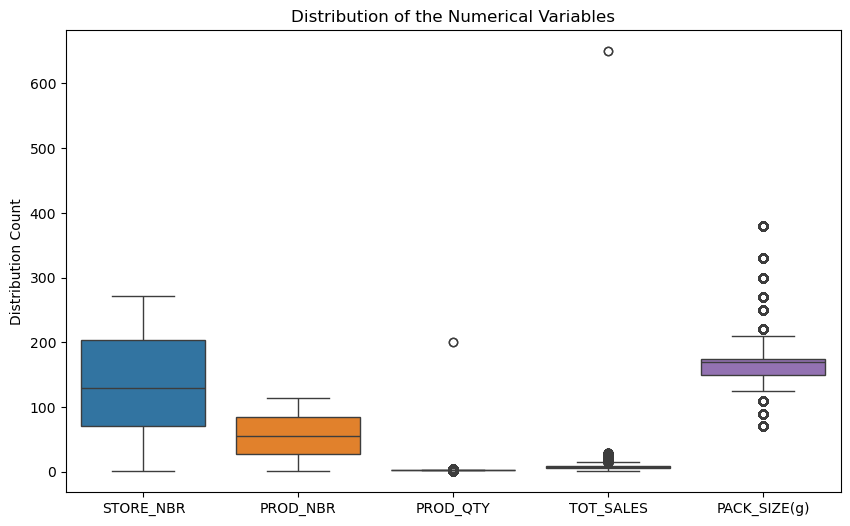

In [232]:
plt.figure(figsize = (10, 6))
df_BOX = df[['STORE_NBR',
             'PROD_NBR', 'PROD_QTY', 'TOT_SALES',
             'PACK_SIZE(g)']]
sns.boxplot(df_BOX)
plt.title('Distribution of the Numerical Variables')
plt.ylabel('Distribution Count')
plt.show()

<Axes: ylabel='Frequency'>

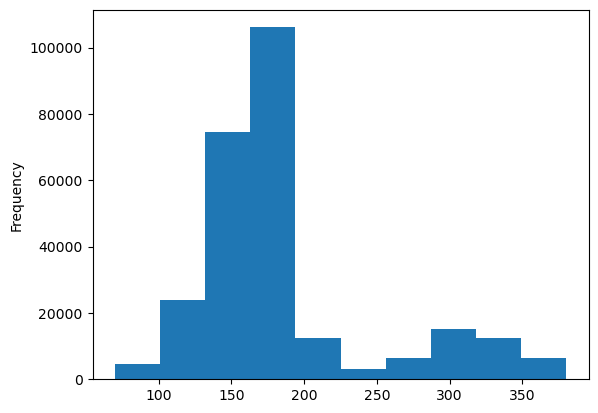

In [659]:
df['PACK_SIZE(g)'].plot(kind = 'hist')

In [652]:
qty_out = df[df['PACK_SIZE(g)'] > 1.5 * (df['PACK_SIZE(g)'].quantile(0.75) - df['PACK_SIZE(g)'].quantile(0.25)) + df['PACK_SIZE(g)'].quantile(0.75)]
qty_out.head(55)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
12,2018-07-03,23,23145,19591,41,Doritos Salsa Mild 300g,2,5.2,300,Doritos,RETIREES,Mainstream
13,2018-07-03,37,37362,33972,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,Old,OLDER SINGLES/COUPLES,Premium
17,2018-07-03,24,24082,20717,76,Woolworths Medium Salsa 300g,2,3.0,300,Woolworths,RETIREES,Mainstream
37,2018-07-03,178,178135,178381,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380,Smiths,YOUNG FAMILIES,Mainstream
40,2018-07-03,19,19201,16459,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,300,Old,RETIREES,Mainstream
45,2018-07-03,20,20180,17157,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,Old,RETIREES,Mainstream
47,2018-07-03,174,174315,175432,71,Twisties Cheese Burger 250g,2,8.6,250,Twisties,OLDER SINGLES/COUPLES,Premium
55,2018-07-03,144,144077,144302,15,Twisties Cheese 270g,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
56,2018-07-03,77,77386,75324,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2,300,Old,YOUNG FAMILIES,Budget
57,2018-07-03,174,174200,175264,15,Twisties Cheese 270g,2,9.2,270,Twisties,OLDER SINGLES/COUPLES,Budget


In [654]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream
2,2018-07-03,124,124236,127984,104,Infuzions Thai SweetChili PotatoMix 110g,1,3.8,110,Infuzions,OLDER FAMILIES,Budget
3,2018-07-03,70,70131,68241,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,Kettle,RETIREES,Premium
4,2018-07-03,33,33140,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-07-02,97,97085,96824,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,Cobs,OLDER FAMILIES,Budget
264832,2019-07-02,148,148317,148317,112,Tyrrells Crisps Ched & Chives 165g,1,4.2,165,Tyrrells,YOUNG SINGLES/COUPLES,Mainstream
264833,2019-07-02,212,212068,210874,113,Twisties Chicken270g,2,9.2,270,Twisties,OLDER FAMILIES,Premium
264834,2019-07-02,55,55029,48630,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110,Cobs,OLDER SINGLES/COUPLES,Premium


### Total Sales:

In [245]:
print('Total sales is :', df['TOT_SALES'].sum())

Total sales is : 1934414.9999999998


### Find out which customers drove more sales

In [247]:
df_sales = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

In [251]:
df_sales = pd.DataFrame(df_sales)
df_sales

,TOT_SALES
PREMIUM_CUSTOMER,
Budget,676211.55
Mainstream,750744.50
Premium,507458.95


<Figure size 1000x600 with 0 Axes>

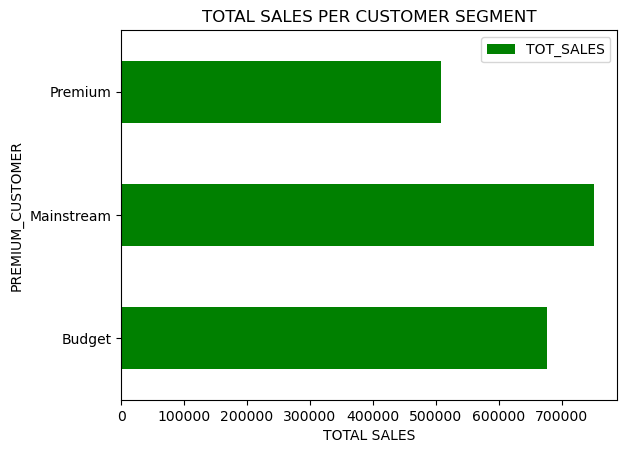

In [532]:
plt.figure(figsize = (10,6))
df_sales.plot(kind = 'barh', color='green')

plt.title('TOTAL SALES PER CUSTOMER SEGMENT')
plt.xlabel('TOTAL SALES')
plt.show()

In [334]:
sales_trend = df.groupby('DATE')['TOT_SALES'].sum()
sales_trend = pd.DataFrame(sales_trend).reset_index()

sales_trend

,DATE,TOT_SALES
0,2018-07-03,5372.2
1,2018-07-04,5315.4
2,2018-07-05,5321.8
3,2018-07-06,5309.9
4,2018-07-07,5080.9
...,...,...
359,2019-06-28,5305.0
360,2019-06-29,5202.8
361,2019-06-30,5299.6
362,2019-07-01,5497.6


### Sales Trend Within a Year (July 2018 to July 2019)

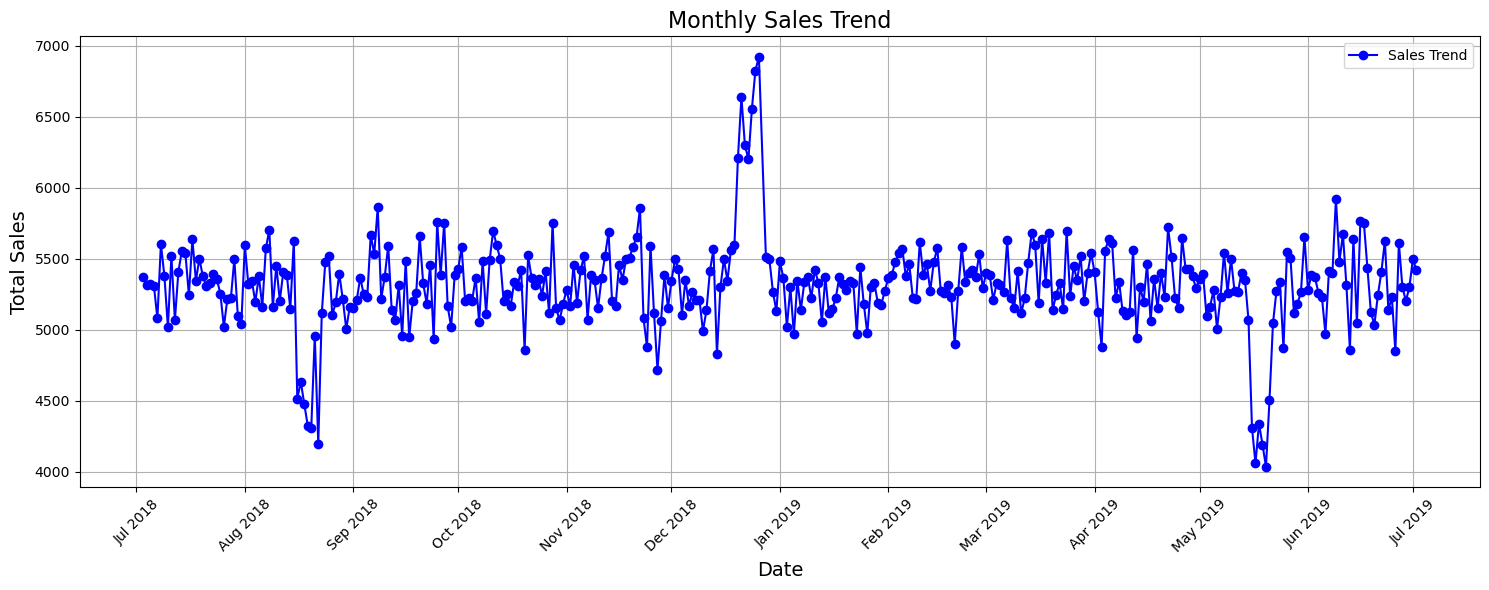

In [349]:
import matplotlib.dates as mdates

# Assuming 'sales_trend' is a DataFrame and 'DATE' is already converted to datetime
plt.figure(figsize=(15, 6))

# Set date formatter and locator for better granularity
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format dates as Month-Year
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month

# Plot the data
plt.plot(sales_trend['DATE'], sales_trend['TOT_SALES'], marker='o',
         linestyle='-', color='blue', label='Sales Trend')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title and labels
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


The obsevered line chart above, displays trend for the Sales of chips from July 2018 to July 2019. It is noted that majority of the total sales were within the range of `$5000` to `$6000`. 
Although, there was a drastic drop in sales sometime within August 2018 and May 2019. The drop was well below `4500`. This will be further investigated to find out why sales were so low. 
Furthermore, the only time a spike in sales occured was in December 2018. A stricking total of almost `$7000`. Further investigation would be conducted on this to understand the situation in detail.

#### Observe more closesly, the exact day at which sales were at the highest.

<Figure size 1000x600 with 0 Axes>

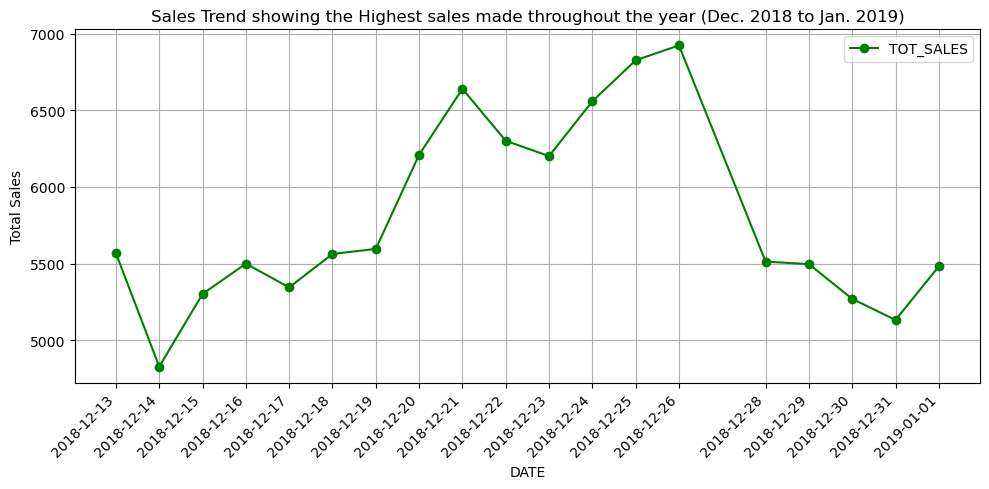

In [757]:
H_salestrend = sales_trend[
    (sales_trend['DATE'] >= '2018-12-13') & (sales_trend['DATE'] <= '2019-01-01')
]

plt.figure(figsize=(10,6))
H_salestrend.plot(kind = 'line', x='DATE', y= 'TOT_SALES', figsize =(10,5), color = 'green', marker = 'o')
plt.grid()
plt.xticks(H_salestrend['DATE'], rotation=45) 
plt.title('Sales Trend showing the Highest sales made throughout the year (Dec. 2018 to Jan. 2019)')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

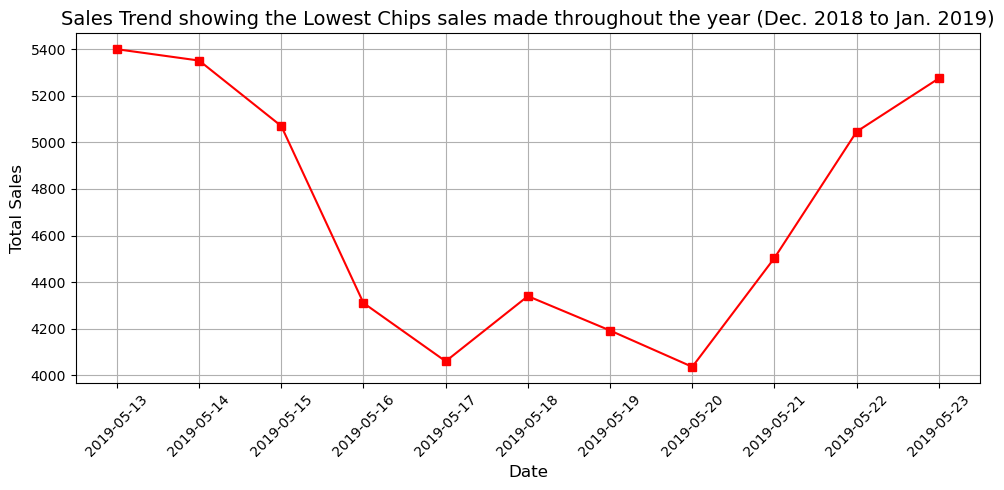

In [477]:
# Filtered data
L_salestrend = sales_trend[
    (sales_trend['DATE'] >= '2019-05-13') & (sales_trend['DATE'] <= '2019-05-23')
]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(L_salestrend['DATE'], L_salestrend['TOT_SALES'], marker='s', linestyle='-', color='red')

# Customize x-axis ticks
plt.xticks(
    ticks=L_salestrend['DATE'], 
    labels=L_salestrend['DATE'].dt.strftime('%Y-%m-%d'),  # Format dates as strings
    rotation=45
)

# Add title and labels
plt.title('Sales Trend showing the Lowest Chips sales made throughout the year (Dec. 2018 to Jan. 2019)', fontsize=14)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [528]:
trend_count = df.groupby('DATE')['TOT_SALES'].count()
trend_count = pd.DataFrame(trend_count).reset_index()

trend_count

,DATE,TOT_SALES
0,2018-07-03,724
1,2018-07-04,711
2,2018-07-05,722
3,2018-07-06,714
4,2018-07-07,712
...,...,...
359,2019-06-28,723
360,2019-06-29,709
361,2019-06-30,730
362,2019-07-01,745


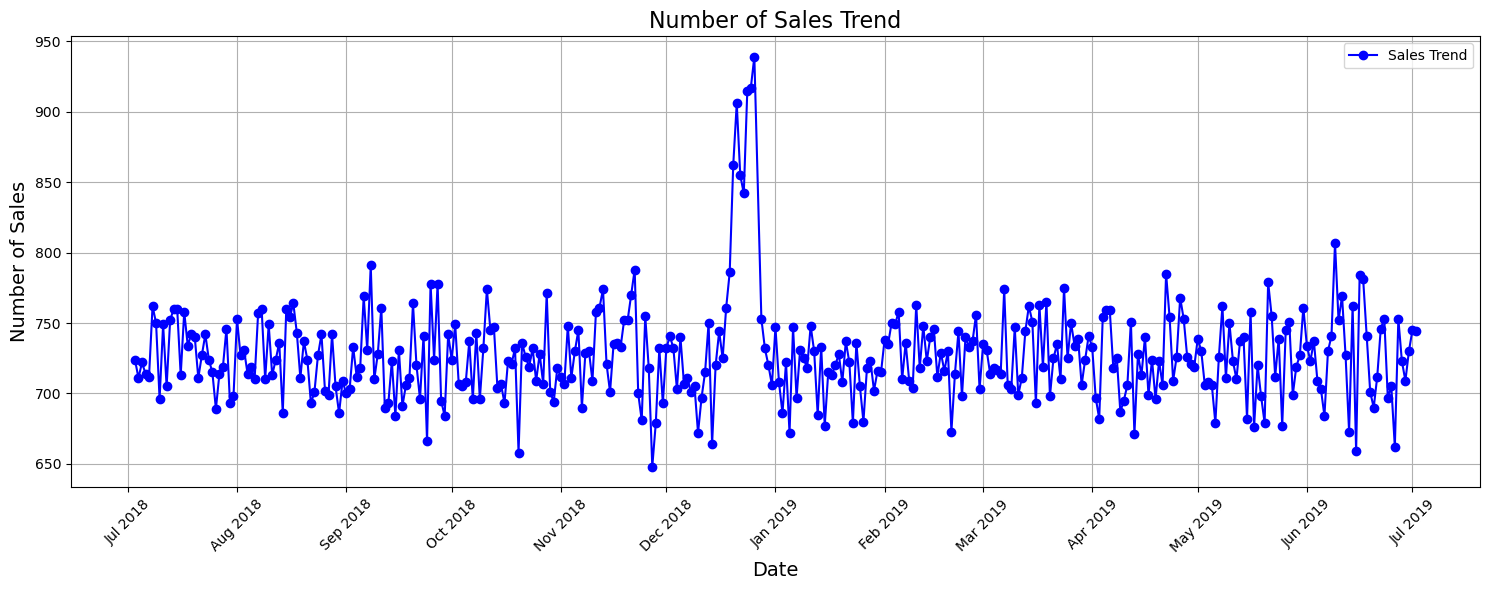

In [530]:
import matplotlib.dates as mdates

# Assuming 'sales_trend' is a DataFrame and 'DATE' is already converted to datetime
plt.figure(figsize=(15, 6))

# Set date formatter and locator for better granularity
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format dates as Month-Year
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show one tick per month

# Plot the data
plt.plot(trend_count['DATE'], trend_count['TOT_SALES'], marker='o',
         linestyle='-', color='blue', label='Sales Trend')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add title and labels
plt.title('Number of Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### Most Sold Products

In [602]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream


In [594]:
most_sold = df.groupby('BRAND_NAME')['PROD_QTY'].sum()
most_sold = pd.DataFrame(most_sold).reset_index()
most_sold = most_sold.sort_values(by = 'PROD_QTY', ascending = False)
most_sold

,BRAND_NAME,PROD_QTY
12,Kettle,79051
20,Smiths,54730
16,Pringles,48019
6,Doritos,47707
23,Thins,26929
17,RRD,22500
10,Infuzions,21119
27,WW,19461
4,Cobs,18571
24,Tostitos,18134


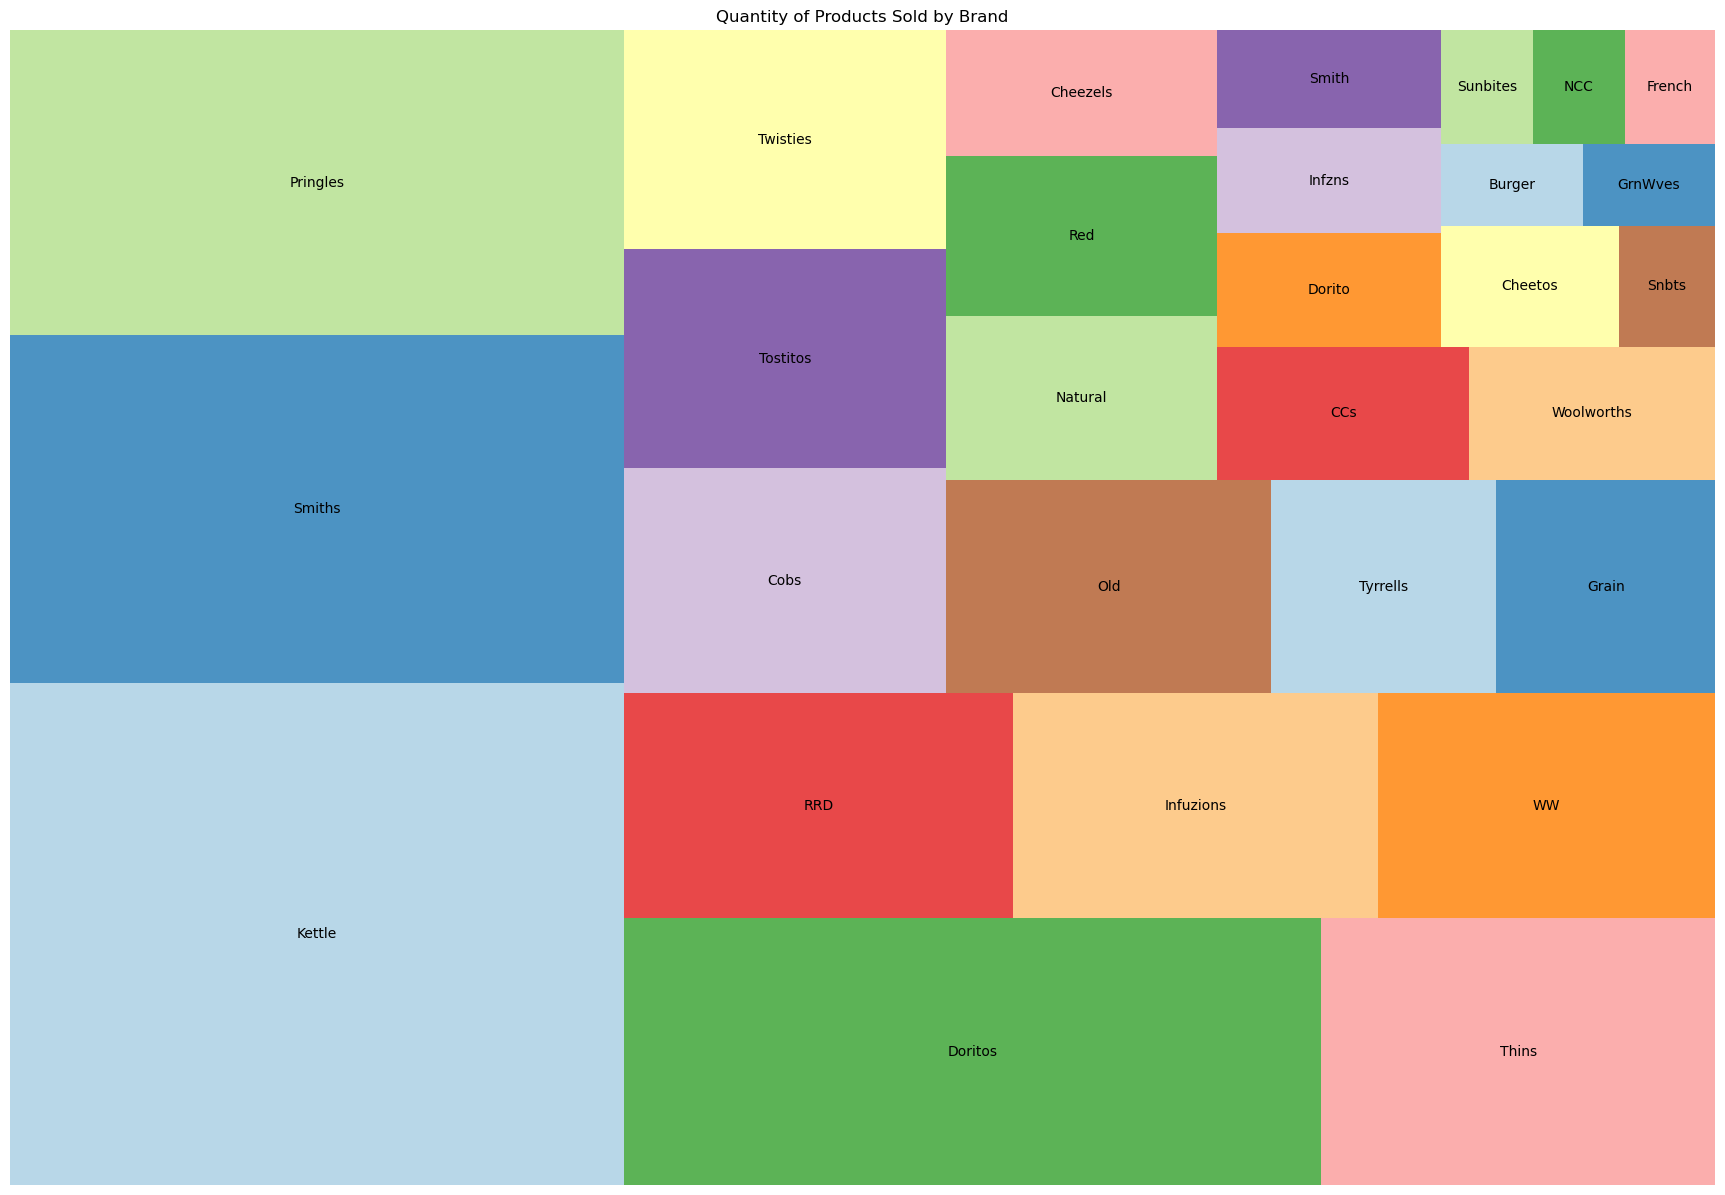

In [600]:
import squarify

# Data preparation
sizes = most_sold['PROD_QTY']
labels = most_sold['BRAND_NAME']

# Plot
plt.figure(figsize=(22, 15))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.Paired.colors)
plt.title('Quantity of Products Sold by Brand')
plt.axis('off')  # Remove axes for clarity
plt.show()


### LifeStage Engagement with Brand
It will show the popularity of `BRAND_NAME` with the `LIFESTAGE`

In [609]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream


In [638]:
df_LS = df[['LIFESTAGE', 'BRAND_NAME', 'TOT_SALES']]
df_LS = df.groupby(['LIFESTAGE', 'BRAND_NAME'], as_index = False)['TOT_SALES'].count()
df_LS

,LIFESTAGE,BRAND_NAME,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Burger,152
1,MIDAGE SINGLES/COUPLES,CCs,433
2,MIDAGE SINGLES/COUPLES,Cheetos,265
3,MIDAGE SINGLES/COUPLES,Cheezels,443
4,MIDAGE SINGLES/COUPLES,Cobs,961
...,...,...,...
198,YOUNG SINGLES/COUPLES,Tostitos,1368
199,YOUNG SINGLES/COUPLES,Twisties,1395
200,YOUNG SINGLES/COUPLES,Tyrrells,955
201,YOUNG SINGLES/COUPLES,WW,1255


Pivoting the dataframe 

In [728]:
pivot_LS = df_LS.pivot(index = 'LIFESTAGE', columns = 'BRAND_NAME', values = 'TOT_SALES')
pivot_LS

BRAND_NAME,Burger,CCs,Cheetos,Cheezels,Cobs,Dorito,Doritos,French,Grain,GrnWves,...,Smith,Smiths,Snbts,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW,Woolworths
LIFESTAGE,,,,,,,,,,,,,,,,,,,,,
MIDAGE SINGLES/COUPLES,152,433,265,443,961,300,2361,117,613,119,...,267,2689,132,117,1316,924,931,611,907,382
NEW FAMILIES,40,93,62,129,288,91,693,32,183,30,...,78,681,31,30,378,277,233,187,240,90
OLDER FAMILIES,353,941,615,813,1624,535,4332,283,1090,339,...,642,5801,337,285,2475,1546,1644,1093,2263,939
OLDER SINGLES/COUPLES,292,851,580,966,2036,684,5236,286,1311,292,...,557,5763,310,274,2969,2039,1949,1340,2035,858
RETIREES,256,741,491,867,1884,619,4852,228,1214,252,...,518,5095,291,244,2792,1850,1890,1259,1710,741
YOUNG FAMILIES,293,898,550,771,1504,484,3950,278,948,273,...,563,5110,295,301,2186,1467,1412,997,1910,851
YOUNG SINGLES/COUPLES,178,594,364,614,1396,472,3538,194,913,163,...,338,3721,180,181,1959,1368,1395,955,1255,576


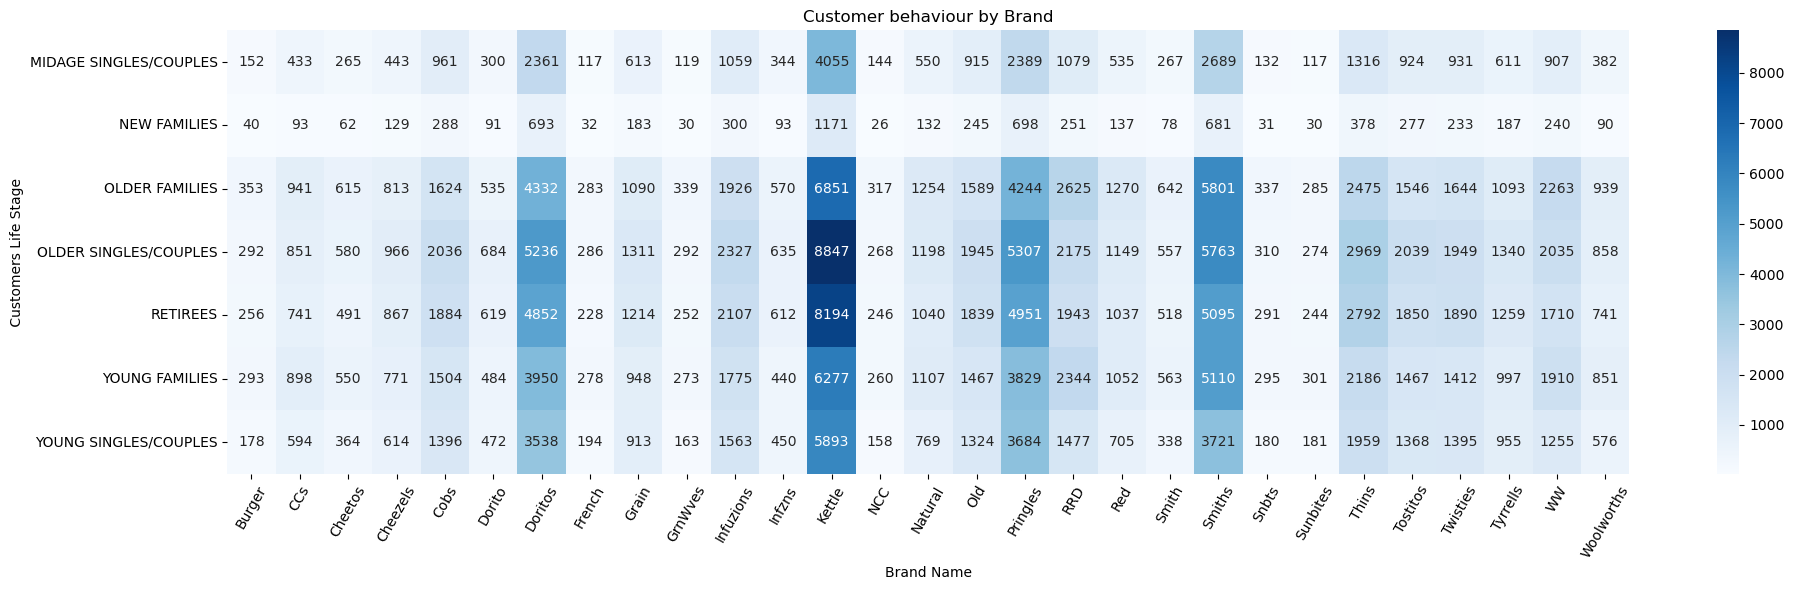

In [736]:
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.heatmap(pivot_LS, annot=True, fmt=".0f", cmap='Blues')
plt.title('Customer behaviour by Brand')
plt.ylabel(" Customers Life Stage ")
plt.xlabel('Brand Name')
plt.xticks(rotation = 60)
plt.tight_layout()
plt.show()



### Effects of the Pack size on Sales and Customer behavior 

In [679]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-03,19,19205,16466,26,Pringles Sweet&Spcy BBQ 134g,1,3.7,134,Pringles,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-03,189,189381,190189,84,GrnWves Plus Btroot & Chilli Jam 180g,1,3.1,180,GrnWves,OLDER FAMILIES,Mainstream


### Individual Stores Sales progress 